In [9]:
import numpy as np
from pandas import read_csv
from matplotlib import pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error 
from math import sqrt 
import statsmodels.api as sm

In [10]:
series = read_csv('datasets/seriesseasonal.csv')
series

,qtr,t,y
0,10 Q1,1,10
1,10 Q2,2,14
2,10 Q3,3,8
3,10 Q4,4,25
4,11 Q1,5,16
5,11 Q2,6,22
6,11 Q3,7,14
7,11 Q4,8,35
8,12 Q1,9,15
9,12 Q2,10,27


In [11]:
train = series.iloc[0:10]
test = series.iloc[10:]
y_hat = test.copy()

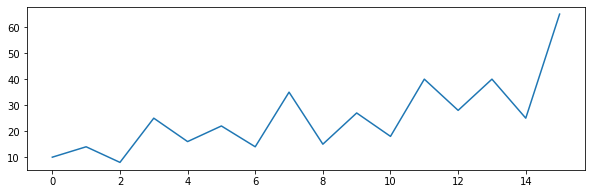

In [12]:
# plot the full series
plt.figure(figsize=(10,3))
plt.plot(series['y'], label='series')
plt.show()

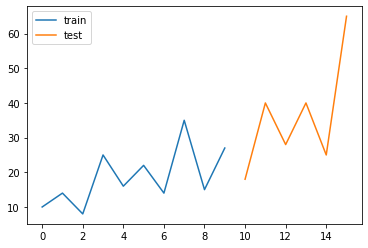

In [13]:
# plot the splits as train and test
plt.plot(train['y'], label='train')
plt.plot(test['y'], label='test')
plt.legend(loc='best')
plt.show()

In [15]:
# Using ExponentialSmoothing
# this is based on Real Statistics worksheet "Holt-Winters 4a"
model = ExponentialSmoothing(np.asarray(train['y']), seasonal_periods=4, trend='add', seasonal='mul')
fit1 = model.fit(smoothing_level=0.0426, smoothing_slope=0.355, smoothing_seasonal=0.161, optimized=True)
y_hat['TES_add_mul'] = fit1.forecast(len(test))
y_hat

C:\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-15-0a6cba4d0095>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = model.fit(smoothing_level=0.0426, smoothing_slope=0.355, smoothing_seasonal=0.161, optimized=True)


,qtr,t,y,TES_add_mul
10,12 Q3,11,18,16.419814
11,12 Q4,12,40,42.988501
12,13 Q1,13,28,21.716669
13,13 Q2,14,40,33.170159
14,13 Q3,15,25,19.852565
15,13 Q4,16,65,51.529352


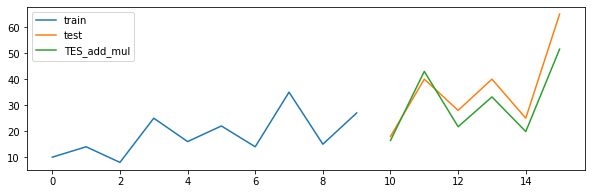

In [16]:
plt.figure(figsize=(10,3))
plt.plot(train['y'], label='train')
plt.plot(test['y'], label='test')
plt.plot(y_hat['TES_add_mul'], label='TES_add_mul')
plt.legend(loc='best')
plt.show()

7.135702895660045


<ipython-input-18-2cafb7c41b3f>:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  sm.tsa.seasonal_decompose(train.y, model='add', freq=3).plot()


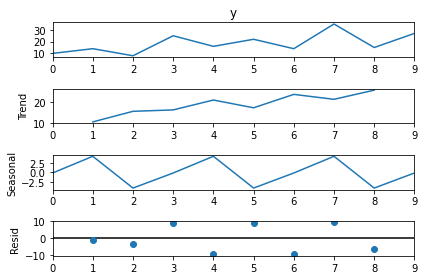

In [18]:
rmse=sqrt(mean_squared_error(test.y, y_hat['TES_add_mul']))
print(rmse)
sm.tsa.seasonal_decompose(train.y, model='add', freq=3).plot()
#result = sm.tsa.stattools.adfuller(Train.count)
plt.show()

In [19]:
# additive model
# corresponds to real-statistics worksheet "Holt Winters 5"
model = ExponentialSmoothing(np.asarray(train['y']), seasonal_periods=4, trend='add', seasonal='add')
fit1 = model.fit(smoothing_level=0.015532, smoothing_slope=1, smoothing_seasonal=0.23088, optimized=False)

C:\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-19-b4dffb2a94e3>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = model.fit(smoothing_level=0.015532, smoothing_slope=1, smoothing_seasonal=0.23088, optimized=False)


In [20]:
y_hat['TES_add'] = fit1.forecast(len(test))
y_hat

,qtr,t,y,TES_add_mul,TES_add
10,12 Q3,11,18,16.419814,22.641838
11,12 Q4,12,40,42.988501,41.252229
12,13 Q1,13,28,21.716669,26.612226
13,13 Q2,14,40,33.170159,33.662740
14,13 Q3,15,25,19.852565,27.841380
15,13 Q4,16,65,51.529352,46.451771


In [21]:
rmse=sqrt(mean_squared_error(test.y, y_hat['TES_add']))
print(rmse)

# this part goes deeper into use of the library, optional

8.339781739486002


3.8655089543113883


<ipython-input-8-a3c8fc3cd540>:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  sm.tsa.seasonal_decompose(train.y, model='add', freq=3).plot()


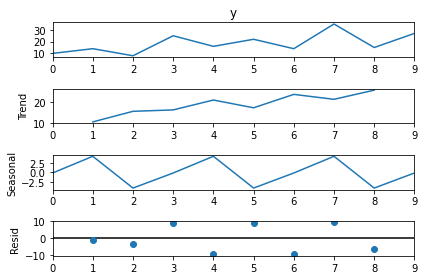

8.339781739486002


C:\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-8-a3c8fc3cd540>:10: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = model.fit(smoothing_level=0.015532, smoothing_slope=1, smoothing_seasonal=0.23088, optimized=False)
<ipython-input-8-a3c8fc3cd540>:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = model.fit(smoothing_level=0.015532, smoothing_slope=1, smoothing_seasonal=0.23088, optimized=False, initial_level=14.25, initial_slope=1.875)
C:\Anaconda3\lib\site-packages\pandas\util\_decorators.py:199: FutureWarning: the 'initial_slope'' keyword is deprecated, use 'initial_trend' instead
  return func(*args, **kwargs)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1099: FutureWarning: Setting initial values during fit is deprecated and w

In [8]:
model.initial_values()
fit1 = model.fit(smoothing_level=0.015532, smoothing_slope=1, smoothing_seasonal=0.23088, optimized=False, initial_level=14.25, initial_slope=1.875)